In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import os
plt.rc('font', family='Batang') # 한글 폰트 지정

데이터 만들기
* 아래 셀을 실행시키시고 넘어가주세요



In [5]:
# 직원 데이터를 랜덤하게 생성하는 함수!
# 셀을 실행만 시키고 넘어가주세요
def get_staff_data(num_person) :
  list_1 = [19,'마케팅','서울',1800]
  list_2 = [20,'개발','경기',2000]
  person_last_name = ['김','이','박','최','강','정','조']
  person_first_name_alphabet = ['혜','경','준','성','민','한','혁','지','우','서','이']
  part_list = ['개발', '마케팅', '영업', '기획', '인사','디자인', '지원']
  address_list = ['서울','경기','인천','강원','충청']

  ret_df = pd.DataFrame([list_1, list_2], index = ['김해인', '이정인'])
  ret_df.columns = ['나이','직무','주소', '급여']

  while (len(ret_df) < num_person) :
    name = np.random.choice(person_last_name) + ''.join([ i for i in np.random.choice(person_first_name_alphabet,size=2, replace=False)])
    while name in ret_df.index :
      name = np.random.choice(person_last_name) + ''.join([ i for i in np.random.choice(person_first_name_alphabet,size=2, replace=False)])
    age = np.random.randint(20,60)
    part = np.random.choice(part_list)
    address = np.random.choice(address_list)
    pay = np.random.randint(1800,7000)
    new_person = pd.DataFrame({'나이' : age, "직무": part, "주소":address, "급여":pay}, index = [name])
    ret_df = pd.concat([ret_df, new_person])
  return ret_df

데이터 생성

* 아래 셀을 실행시키고 확인해보세요!

In [6]:
# 직원 정보 데이터를 생성!
# 지난번 다뤘던 이 데이터를 시각화 시켜 봅시다.
staff_df = get_staff_data(200)
staff_df.head(5)

,나이,직무,주소,급여
김해인,19,마케팅,서울,1800
이정인,20,개발,경기,2000
이서민,48,기획,인천,3839
최한이,21,영업,경기,3934
강한민,30,영업,경기,4563


----------------------------

###데이터 시각화

* 직무 별로, 직원들이 몇 명씩 있는지 확인해보려면 어떤 함수를 쓸 수 있을까요?
* *Hint : sns. c**ntplot()*

<Axes: xlabel='직무', ylabel='count'>

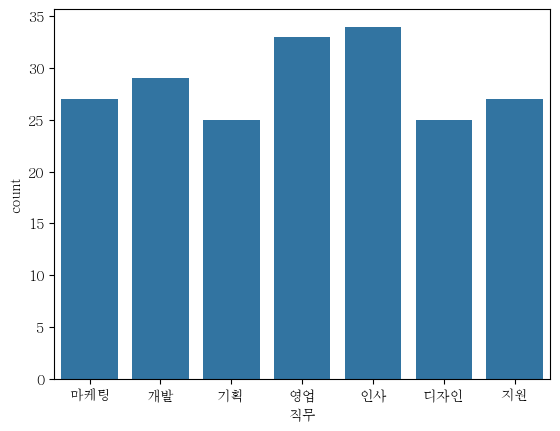

In [10]:
sns.countplot(data= staff_df , x = '직무')

마찬가지로, 직원들의 '주소' 도 한번 나타내볼까요?

<Axes: xlabel='주소', ylabel='count'>

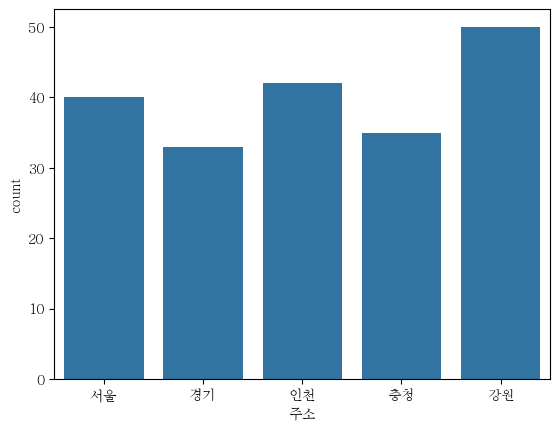

In [11]:
sns.countplot(data = staff_df, x = '주소')

----------------------------

* 그렇다면 직원들의 급여 값들의 분포를 확인해봅시다
* *Hint : sns.d**plot()*

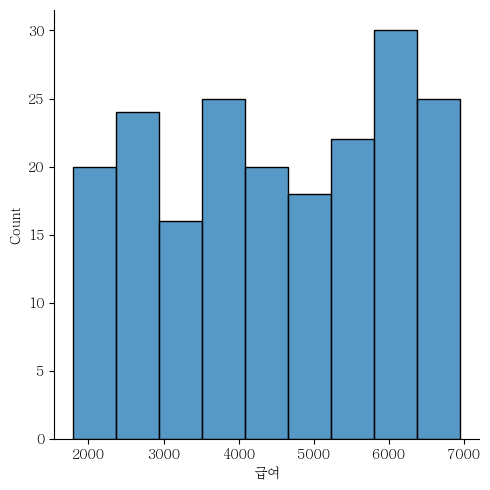

In [12]:
sns.displot(data = staff_df, x = '급여')

bins 옵션을 바꿔보세요!

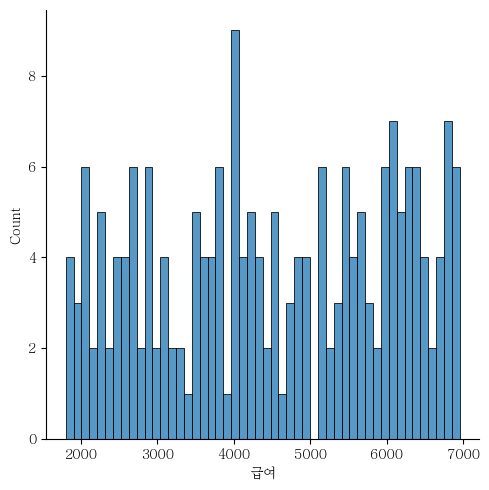

In [13]:
sns.displot(data = staff_df, x = '급여', bins = 50)



---



#펭귄 데이터셋으로 시각화 실습하기

## 펭귄 데이터셋 불러오기

sns.load_dataset() 함수로, "penguins" 데이터셋을 불러와보세요

In [14]:
pg_df = sns.load_dataset('penguins')

---------------------------

###데이터 살펴보기

데이터변수.head(5) 함수로, 데이터 몇 개를 살펴보세요

In [15]:
pg_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


--------------------------------------------

##Penguin dataset
* species : 펭귄 종
* island : 서식지
* bill_length_mm : 부리의 길이
* bill_depth_mm : 부리의 깊이
* flipper_length_mm : 날개 길이
* body_mass_g : 몸무게
* sex : 성별


In [22]:
# shape, ndim, size 를 이용해서, DataFrame을 파악해보세요
print('형태: ', pg_df.shape)
print('차원:', pg_df.ndim)
print('총 원소의 갯수:', pg_df.size)

형태:  (344, 7)
차원: 2
총 원소의 갯수: 2408


데이터의 데이터타입 등을 알아보는

데이터변수.info() 함수를 사용해 살펴보세요

In [20]:
pg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


데이터변수.describe() 함수로 기초적인 통계량을 살펴보세요

In [21]:
pg_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [35]:
pg_df.describe(include = 'O') # categorical features' descriptive summary 

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


----------------------------------------

###데이터 시각화

펭귄의 각 species 별로 얼마나 분포했는지 시각화 하려면 어떻게 할 수 있을까요?

아래에서 가장 적절한 시각화 함수는 무엇일까요?
* countplot
* displot
* relplot
* catplot

<Axes: xlabel='species', ylabel='count'>

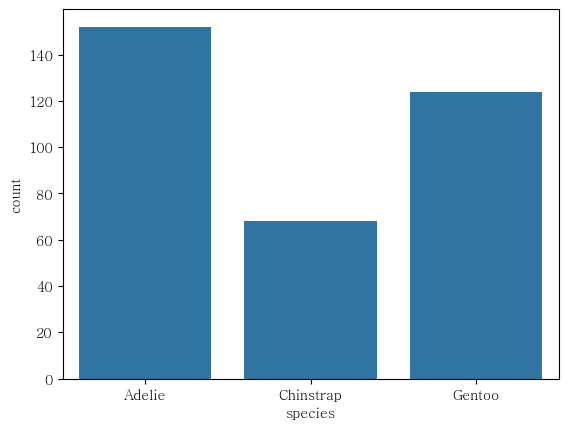

In [23]:
sns.countplot(data = pg_df, x = 'species')

펭귄 부리 길이의 분포를 대략적으로 나타내보고 싶습니다.

어떤 간단한 함수를 쓸 수 있을까요?

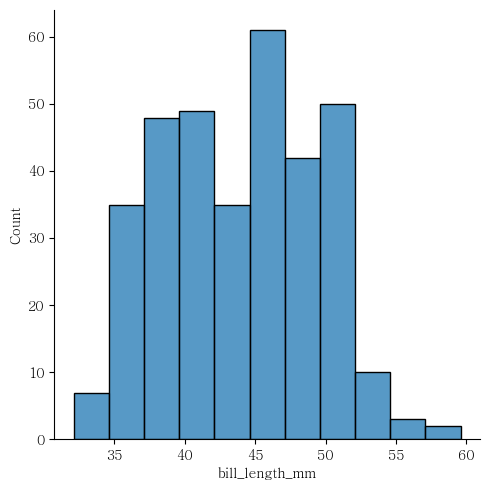

In [36]:
sns.displot(data = pg_df, x = 'bill_length_mm')

이번에는 펭귄 부리의 깊이에 대한 값을 시각화 시켜보고 싶습니다.

위에서와 마찬가지로 시각화 시켜보세요.

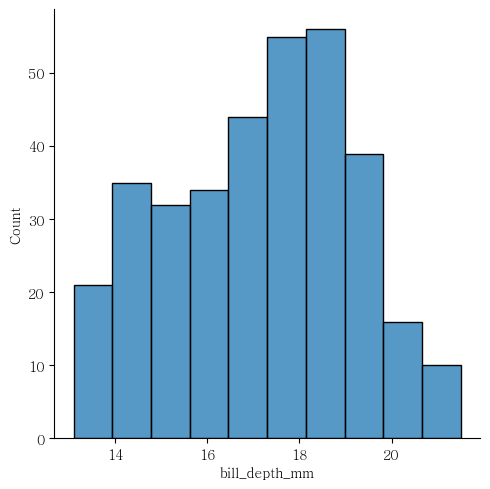

In [37]:
sns.displot(data = pg_df, x = 'bill_depth_mm')

---------------------------------

그렇다면 부리의 길이와 깊이, 값은 상관관계가 있을까요?

두 Feature의 상관관계를 확인해보려면 어떤 함수를 써 볼 수 있을까요?

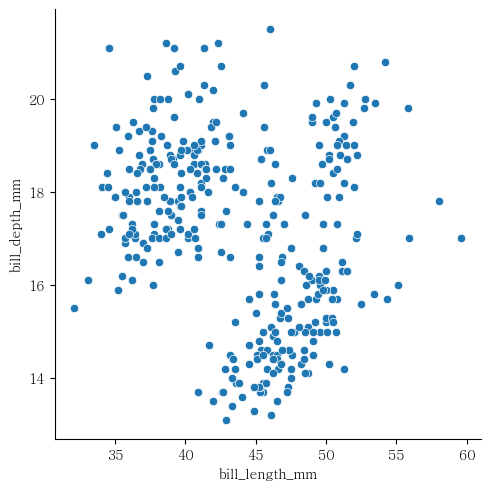

In [34]:
sns.relplot(data = pg_df, x= 'bill_length_mm', y = 'bill_depth_mm')

부리의 길이와 깊이만을 띄워봐서는 잘 알 수가 없네요.

그렇다면 방금의 시각화 함수에서, species에 따라 색깔을 입히면 어떻까요?

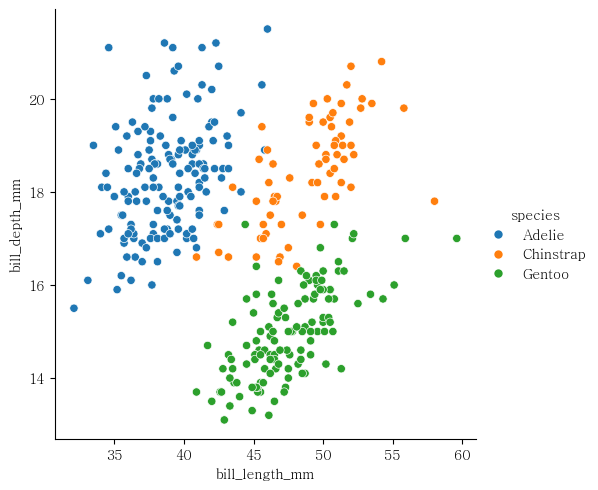

In [38]:
sns.relplot(data = pg_df, x= 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

부리의 길이, 깊이 값은 펭귄들의 species와 꽤 상관관계가 있어 보입니다!

이후에 머신러닝을 학습 시킬 때 유용한 feature가 되겠죠?

-------------------------------------

이번에는 펭귄의 몸무게 body_mass_g를 살펴보고 싶습니다

펭귄의 species 별로, 몸무게들의 분포를 나타낼 수 있는 방법이 뭐가 있을까요?

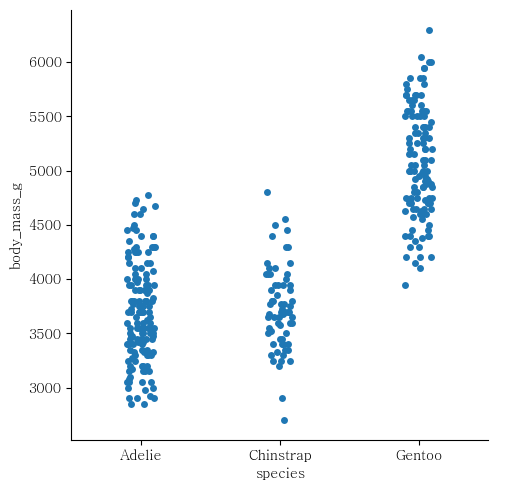

In [39]:
sns.catplot(data = pg_df, x = 'species', y = 'body_mass_g')

boxplot, violinplot 활용해봅시다!

<Axes: xlabel='species', ylabel='body_mass_g'>

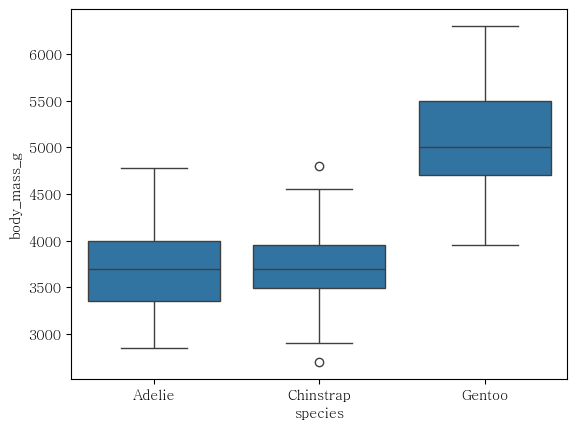

In [40]:
sns.boxplot(data = pg_df, x= 'species', y ='body_mass_g')

<Axes: xlabel='species', ylabel='body_mass_g'>

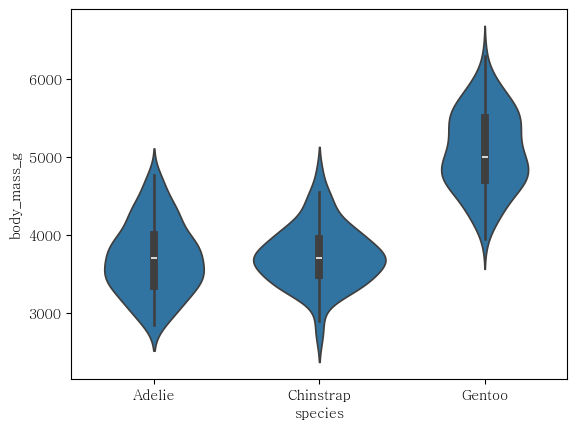

In [41]:
sns.violinplot(data = pg_df, x= 'species', y ='body_mass_g')



---





---



Seaborn 연습문제 끝